# <span style="color:#1aa353; font: helvetica"> Pet Care Startup Analysis</span>

---
### Table of Contents
* [Introduction](#Introduction)
    * [Background](#Bg)
    * [Setup Import and Database Connection](#imports)
    
* [Analysis](#analysis)
    * [Recent Booking Rate](#RBRA)
    * [Take Rate](#TRA)
    * [Search Engine Marketing](#SEMA)
* [Conclution](#conc)
    
* [Appendix](#app)
    * Database
    * Code

## <span style="color:#1aa353; font: helvetica">Introduction</span> <a id='Introduction'></a> 
---
### Background



### Setup Imports and Database Connection <a id='setup'></a> 

In [17]:
import sqlite3
import os

from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a default path to the database db1.sqlite3
DEFAULT_PATH = os.path.join(os.getcwd(),'db1.sqlite3');

# Establish a connection to the database 
conn = sqlite3.connect(DEFAULT_PATH)

# Create cursor object
cur = conn.cursor()

## <span style="color:#1aa353; font: helvetica"> Analysis</span> <a id='analysis'></a> 
---

This section analyzes three cases based on the data in the database.

### Recent Booking Rate <a id='RBRA'></a>  

> The snapshot of this database was taken on `2018-08-02` at midnight and only contains data reflecting events prior to that date. A junior analyst is investigating daily booking rate during the days prior to the snapshot and is concerned about an apparent downward trend. 

* [Data Set](#ds1)     
* [Analysis](#ana1)         
* Summary

#### Data Set <a id='ds1'></a> 
In this case, we need to look into the `conversations_conversation` table to find out the amount of booking and conversation events for each day.

In [2]:
def show_conversations():    
    cur.execute("SELECT * \
                 FROM conversations_conversation \
                 LIMIT 10")
    rows = cur.fetchall()
 
    for row in rows:
        print(row)

show_conversations();

(1, '2018-07-26', '2018-07-31', 5, '2018-07-16 10:17:53.460035', 120, None, 64393, 4646, None, None)
(2, '2018-08-10', '2018-08-16', 6, '2018-08-01 10:20:48.626868', 132, None, 64392, 10126, None, None)
(3, '2018-06-16', '2018-06-19', 3, '2018-06-05 16:46:39.542467', 168, None, 64391, 20677, None, None)
(4, '2018-07-13', '2018-07-20', 7, '2018-07-02 09:12:22.275923', 490, None, 64391, 3847, None, None)
(5, '2018-07-02', '2018-07-07', 5, '2018-06-21 16:02:48.694725', 140, None, 64389, 9982, None, None)
(6, '2018-07-04', '2018-07-07', 3, '2018-06-23 16:16:16.891344', 78, None, 64388, 14772, '2018-06-27 14:39:51.433544', None)
(7, '2018-07-31', '2018-08-04', 4, '2018-07-21 04:55:57.951572', 100, None, 64386, 14783, '2018-07-22 02:50:20.676664', None)
(8, '2018-07-03', '2018-07-08', 5, '2018-06-25 20:35:54.744353', 280, None, 64385, 19407, None, None)
(9, '2018-07-02', '2018-07-03', 1, '2018-06-21 06:23:08.092389', 23, None, 64384, 7656, '2018-06-23 01:49:33.596667', None)
(10, '2018-08-03

#### Analysis <a id='ana1'></a> 
> 1. First, let's reproduce their results. They tell you that daily booking rate is defined to be the percentage of conversations created each day that eventually book. What is the daily booking rate for each of the 90 days prior to the snapshot? Is there a downward trend?


In [3]:
# start_date: 
# end_date:

def daily_booking_rate():    
    cur.execute("SELECT DATE(added), 100.0 * COUNT(DISTINCT booked_at) / COUNT(*) \
                 FROM conversations_conversation \
                 WHERE DATE(added) >= DATE('2018-08-02', '-90 days') \
                 GROUP BY 1")
    rows = cur.fetchall()
 
    for row in rows:
        print(row)

daily_booking_rate();

('2018-05-04', 44.70046082949309)
('2018-05-05', 44.690265486725664)
('2018-05-06', 44.78260869565217)
('2018-05-07', 48.54368932038835)
('2018-05-08', 40.70796460176991)
('2018-05-09', 38.64734299516908)
('2018-05-10', 43.21608040201005)
('2018-05-11', 44.97607655502392)
('2018-05-12', 38.35616438356164)
('2018-05-13', 47.0873786407767)
('2018-05-14', 43.54066985645933)
('2018-05-15', 43.111111111111114)
('2018-05-16', 40.56603773584906)
('2018-05-17', 50.0)
('2018-05-18', 43.81443298969072)
('2018-05-19', 44.339622641509436)
('2018-05-20', 44.97607655502392)
('2018-05-21', 41.78403755868545)
('2018-05-22', 45.77777777777778)
('2018-05-23', 37.65182186234818)
('2018-05-24', 51.89393939393939)
('2018-05-25', 44.44444444444444)
('2018-05-26', 46.91943127962085)
('2018-05-27', 45.77777777777778)
('2018-05-28', 41.666666666666664)
('2018-05-29', 50.0)
('2018-05-30', 41.338582677165356)
('2018-05-31', 39.76833976833977)
('2018-06-01', 44.10480349344978)
('2018-06-02', 44.03669724770642)
('

Let's plot the data:

> 2. Can you narrate a reason why this trend exists? Is there a reason to be concerned? Please provide additional data and evidence to justify your position.

Even though the trend does exist, there is no need to worry about it because it is due to the cutoff of the database. 

Now, let's run another test to see the average time for a conversation to convert to a booking event.

### Take Rate Analysis <a id='TRA'></a> 
> Each user has a fee associated with their account (recorded on people_person). If that user books as an owner, the company charges a service fee (in addition to the booking total) that is a percentage of the booking total (to a maximum of \$50). Also, each service has a fee amount (recorded on services_service). Before a provider receives their payment, the company takes a percentage of the booking total as dictated by that fee. As an example, suppose an owner has a fee amount of 5% and books with a service that has a fee amount of 15%. If the booking was for \$100, then the owner would get charged \$105 (adding the ownerʼs fee). The \$5 owner fee would go to the company. An additional \$15 would also go to the company since the service had a 15% fee associated to it. The remaining \$85 would go to the provider. To summarize: 

|             |Amount| Description                     |
| :------------    |---   | :-------------------------:     |
| Booking Total    | \$100| e.g., 4 walks at \$25/walk      | 
| Owner Fee        | \$5  | 5% of the booking total         |
| Gross Billings   | \$105| charged to the owner            |   
| Service Fee      | \$15 | 15% of the booking total        |
| Net Revenue      | \$20 | all fees that go to the company |
| Provider Payment | \$85 | earnings for the provider       |


* [Data Set](#ds2)        
* [Analysis](#ana2)         
* Summary

#### Data Set <a id='ds2'></a> 
In this analysis, we need to look into three tables: 
1. `people_person`:              to determine the owner fee
2. `services_service`:           to determine the service fee
3. `conversations_conversation`: to determine the booking total and related user id.

In [4]:
def show_people():    
    cur.execute("SELECT * FROM people_person LIMIT 10")
    rows = cur.fetchall()
 
    for row in rows:
        print(row)

show_people();

(1, 'Leanora', 'Allcock', 'leanora.allcock635@hotmail.com', '', '2016-08-02 14:59:15.095591', 'https://placekitten.com/242/269', 0, 'f')
(2, 'Elroy', 'Blanding', 'elroy.blanding510@yahoo.com', '', '2016-08-02 18:15:30.105940', 'https://placekitten.com/373/320', 0, 'm')
(3, 'Jeanice', 'Aleman', 'jeanice.aleman392@hotmail.com', '', '2016-08-02 16:11:09.542004', 'https://placekitten.com/238/264', 0, 'f')
(4, 'Tamala', 'Polhamus', 'tamala.polhamus146@aol.com', '', '2016-08-02 18:02:40.389299', 'https://placekitten.com/220/223', 0, 'f')
(5, 'Alethea', 'Gubler', 'alethea.gubler708@aol.com', '', '2016-08-02 14:31:53.163034', 'https://placekitten.com/284/339', 0, 'f')
(6, 'Milly', 'Degre', 'milly.degre525@rover.com', '', '2016-08-02 12:47:16.876553', 'https://placekitten.com/396/278', 0, 'f')
(7, 'Yvonne', 'Guiney', 'yvonne.guiney923@aol.com', '', '2016-08-02 11:00:13.934802', 'https://placekitten.com/324/200', 0, 'f')
(8, 'Irving', 'Kaetzel', 'irving.kaetzel198@aol.com', '', '2016-08-02 16:34

In [5]:
def show_services():    
    cur.execute("SELECT * FROM services_service LIMIT 10")
    rows = cur.fetchall()
 
    for row in rows:
        print(row)

show_services();

(1, 'boarding', 'strict', 1, 1, 1, 1, 0, 1, 1, 1, 4, 1, 0.15, 35, '2016-08-02 14:59:15.095591')
(2, 'dog-walking', 'strict', 1, 0, 1, 1, 0, 0, 1, 1, 5, 1, 0.15, 26, '2016-08-02 14:59:15.095591')
(3, 'boarding', 'moderate', 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 0.15, 31, '2016-08-02 18:15:30.105940')
(4, 'dog-walking', 'strict', 1, 0, 1, 0, 1, 0, 0, 1, 5, 2, 0.15, 27, '2016-08-02 18:15:30.105940')
(5, 'day-care', 'strict', 1, 0, 1, 1, 0, 1, 1, 1, 5, 2, 0.15, 30, '2016-08-02 18:15:30.105940')
(6, 'dog-walking', 'flexible', 1, 0, 1, 0, 1, 1, 0, 1, 7, 3, 0.15, 20, '2016-08-02 16:11:09.542004')
(7, 'dog-walking', 'strict', 0, 1, 0, 0, 1, 1, 1, 1, 7, 4, 0.15, 20, '2016-08-02 18:02:40.389299')
(8, 'day-care', 'flexible', 1, 0, 1, 0, 1, 1, 1, 1, 4, 4, 0.15, 24, '2016-08-02 18:02:40.389299')
(9, 'boarding', 'strict', 1, 0, 1, 0, 1, 1, 0, 0, 3, 5, 0.15, 34, '2016-08-02 14:31:53.163034')
(10, 'dog-walking', 'strict', 1, 0, 1, 0, 1, 1, 0, 1, 2, 5, 0.15, 20, '2016-08-02 14:31:53.163034')


In [6]:
show_conversations();

(1, '2018-07-26', '2018-07-31', 5, '2018-07-16 10:17:53.460035', 120, None, 64393, 4646, None, None)
(2, '2018-08-10', '2018-08-16', 6, '2018-08-01 10:20:48.626868', 132, None, 64392, 10126, None, None)
(3, '2018-06-16', '2018-06-19', 3, '2018-06-05 16:46:39.542467', 168, None, 64391, 20677, None, None)
(4, '2018-07-13', '2018-07-20', 7, '2018-07-02 09:12:22.275923', 490, None, 64391, 3847, None, None)
(5, '2018-07-02', '2018-07-07', 5, '2018-06-21 16:02:48.694725', 140, None, 64389, 9982, None, None)
(6, '2018-07-04', '2018-07-07', 3, '2018-06-23 16:16:16.891344', 78, None, 64388, 14772, '2018-06-27 14:39:51.433544', None)
(7, '2018-07-31', '2018-08-04', 4, '2018-07-21 04:55:57.951572', 100, None, 64386, 14783, '2018-07-22 02:50:20.676664', None)
(8, '2018-07-03', '2018-07-08', 5, '2018-06-25 20:35:54.744353', 280, None, 64385, 19407, None, None)
(9, '2018-07-02', '2018-07-03', 1, '2018-06-21 06:23:08.092389', 23, None, 64384, 7656, '2018-06-23 01:49:33.596667', None)
(10, '2018-08-03

#### Analysis <a id='ana2'></a> 

> 1. In each month, what were the gross billings and net revenue?

In [44]:
def to_date_value(query):
    dates = []
    billings = []
    
    for row in query:
        # Append date year, month, 1
        dates.append( datetime(int(row[0]), int(row[1]), 1))
        billings.append( float(row[2]) )
        
    return dates, billings
    

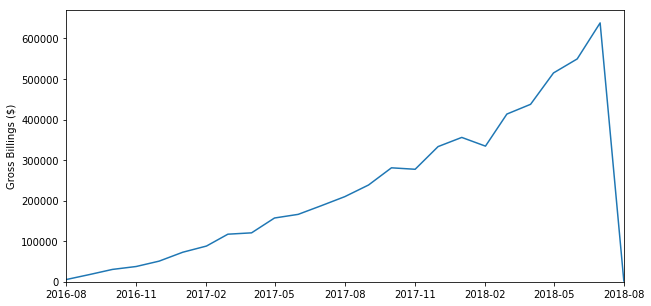

In [46]:
from datetime import datetime
def get_monthly_gross_billings():    
    cur.execute("SELECT strftime('%Y', added) AS year \
                        ,strftime('%m',added) AS month \
                        ,SUM(booking_total + MIN(1.0 * pp.fee * booking_total, 50)) AS 'Gross Billings' \
                 FROM conversations_conversation cc \
                 LEFT JOIN people_person pp \
                 ON cc.requester_id = pp.id \
                 WHERE booked_at IS NOT NULL \
                     AND cancelled_at IS NULL\
                 GROUP BY 1, 2 \
                 ORDER BY 1 ASC, 2 ASC")
    rows = cur.fetchall()
 
    return rows

MGB = get_monthly_gross_billings()

# Convert query to datetime objects and values
dates, billings = to_date_value(MGB)

figure, axis = plt.subplots(figsize=(10,5))
# Set x-axis as date
axis.xaxis_date()

# Plot billings vs. date
plt.plot(dates, billings)
plt.ylabel('Gross Billings ($)')

# Limit x-range by data
plt.xlim(dates[0], dates[-1])
plt.ylim(0)

plt.show()

In [8]:
def monthly_net_revenue():    
    cur.execute("SELECT strftime('%Y', cc.added) AS year \
                        ,strftime('%m', cc.added) AS month\
                        ,SUM(MIN(1.0 * pp.fee * booking_total, 50)        \
                            + 1.0 * ss.fee * booking_total) 'Net Revenue' \
                FROM conversations_conversation cc \
                LEFT JOIN people_person pp      \
                ON cc.requester_id = pp.id      \
                LEFT JOIN services_service ss   \
                ON cc.service_id = ss.id        \
                WHERE booked_at IS NOT NULL     \
                    AND cancelled_at IS NULL    \
                GROUP BY 1, 2                   \
                ORDER BY 1 ASC, 2 ASC")        
    rows = cur.fetchall()
 
    for row in rows:
        print(row)

monthly_net_revenue();

('2016', '08', 892.84)
('2016', '09', 2976.0199999999995)
('2016', '10', 5088.269999999998)
('2016', '11', 6284.390000000001)
('2016', '12', 8589.08)
('2017', '01', 13537.439999999997)
('2017', '02', 16369.119999999999)
('2017', '03', 21959.789999999997)
('2017', '04', 22654.389999999992)
('2017', '05', 29671.609999999986)
('2017', '06', 32386.030000000013)
('2017', '07', 37979.04999999999)
('2017', '08', 43639.89999999998)
('2017', '09', 51398.21)
('2017', '10', 60971.66999999995)
('2017', '11', 60342.059999999976)
('2017', '12', 75997.92000000001)
('2018', '01', 82577.81999999999)
('2018', '02', 78065.24999999991)
('2018', '03', 96924.9599999999)
('2018', '04', 103725.30999999995)
('2018', '05', 122690.74999999978)
('2018', '06', 131673.82999999987)
('2018', '07', 153656.49999999994)
('2018', '08', 490.77)


>2. Define take rate to be the percentage of gross billings that is net revenue. In the previous example, the take rate is slightly more than 19% since \$20/\$105 is approximately 0.1905. In each month, what was the aggregate take rate?

In [9]:
def monthly_take_rate():    
    cur.execute("SELECT strftime('%Y', cc.added) AS year \
                        ,strftime('%m', cc.added) AS month\
                        ,100 * \
                         (SUM(MIN(1.0 * pp.fee * booking_total, 50) \
                              + 1.0 * ss.fee * booking_total))    \
                         / (SUM(booking_total + MIN(1.0 * pp.fee * booking_total, 50))) \
                         AS 'take rate'    \
                FROM conversations_conversation cc \
                LEFT JOIN people_person pp      \
                ON cc.requester_id = pp.id      \
                LEFT JOIN services_service ss   \
                ON cc.service_id = ss.id        \
                WHERE booked_at IS NOT NULL     \
                    AND cancelled_at IS NULL    \
                GROUP BY 1, 2                   \
                ORDER BY 1 ASC, 2 ASC")
       
    rows = cur.fetchall()
 
    for row in rows:
        print(row)

monthly_take_rate();

('2016', '08', 16.66666666666666)
('2016', '09', 16.666666666666657)
('2016', '10', 16.666666666666668)
('2016', '11', 16.66666666666668)
('2016', '12', 16.8669711294501)
('2017', '01', 18.565829752609474)
('2017', '02', 18.57106941528732)
('2017', '03', 18.70707968363606)
('2017', '04', 18.768084598911788)
('2017', '05', 18.862937457974713)
('2017', '06', 19.4755181549835)
('2017', '07', 20.256746550719924)
('2017', '08', 20.78130554422597)
('2017', '09', 21.536723004757395)
('2017', '10', 21.693944296159316)
('2017', '11', 21.74757770024585)
('2017', '12', 22.79486011026361)
('2018', '01', 23.195735377593156)
('2018', '02', 23.336880763016232)
('2018', '03', 23.43518995241775)
('2018', '04', 23.701845409085657)
('2018', '05', 23.823388778182544)
('2018', '06', 23.960839588000525)
('2018', '07', 24.0701298564993)
('2018', '08', 24.16193622394974)


> 3. Did take rate trend up or trend down or remain unchanged over time?

> 4. If it did change, investigate why and provide an explanation. 

### Search Engine Marketing Analysis <a id='SEMA'></a> 
>Search engine advertising is a huge driver of new user accounts. Users that are aquired through search engine marketing can be identified by looking at people_person.channel. These users will have 'Google' listed there. Historically, this company spent an average of \$30 per account to advertise in the 2nd position on Google. However, on `2018-05-04`, they decided to start bidding for the 1st position. Since `2018-05-04`, they have spent \$207180 in total.

* [Data Set](#ds3)        
* [Analysis](#ana3)         
* Summary

#### Data Set <a id='ds3'></a> 

In this analysis, we only need to look into people_person table.

In [10]:
show_people();

(1, 'Leanora', 'Allcock', 'leanora.allcock635@hotmail.com', '', '2016-08-02 14:59:15.095591', 'https://placekitten.com/242/269', 0, 'f')
(2, 'Elroy', 'Blanding', 'elroy.blanding510@yahoo.com', '', '2016-08-02 18:15:30.105940', 'https://placekitten.com/373/320', 0, 'm')
(3, 'Jeanice', 'Aleman', 'jeanice.aleman392@hotmail.com', '', '2016-08-02 16:11:09.542004', 'https://placekitten.com/238/264', 0, 'f')
(4, 'Tamala', 'Polhamus', 'tamala.polhamus146@aol.com', '', '2016-08-02 18:02:40.389299', 'https://placekitten.com/220/223', 0, 'f')
(5, 'Alethea', 'Gubler', 'alethea.gubler708@aol.com', '', '2016-08-02 14:31:53.163034', 'https://placekitten.com/284/339', 0, 'f')
(6, 'Milly', 'Degre', 'milly.degre525@rover.com', '', '2016-08-02 12:47:16.876553', 'https://placekitten.com/396/278', 0, 'f')
(7, 'Yvonne', 'Guiney', 'yvonne.guiney923@aol.com', '', '2016-08-02 11:00:13.934802', 'https://placekitten.com/324/200', 0, 'f')
(8, 'Irving', 'Kaetzel', 'irving.kaetzel198@aol.com', '', '2016-08-02 16:34

#### Analysis
>1. For each day, determine the count of users that joined and were acquired through Google. Plot this and confirm there is an inflection point on or near `2018-05-04`.

In [11]:
SELECT DATE(date_joined), COUNT(*)
FROM people_person
WHERE channel = 'Google'
GROUP BY 1
ORDER BY 1 ASC;

SyntaxError: invalid syntax (<ipython-input-11-23acf672538f>, line 1)

>2. How many users were acquired via Google advertising since `2018-05-04` and what was the average cost per account?

>3. Estimate how many users would have been acquired had the company not changed its bidding strategy. What would have been the marketing spend in that case?

>4. How many additional accounts where created? What was the marginal cost per account for these additional accounts?

## Conclution 